In [5]:
import fastai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dies.gan import *

from dies.data import tp_from_df_from_dtypes, get_y_ranges, split_by_year
from dies.mlp import MultiLayerPerceptron

from torch.nn import Sigmoid
from fastai.layers import Identity
from fastai.optimizer import RMSProp
from fastai.optimizer import Adam
from fastai.tabular.data import TabularDataLoaders

In [6]:
fastai.__version__
pd.options.mode.chained_assignment = None

In [7]:
loss_type = 2
epochs = 50
lr = 1e-3
bs = 128

In [8]:
n_features = 4
n_samples = bs*100
syn_x = np.random.normal(size=(n_samples, n_features))
columns = [f'x_{n}' for n in range(n_features)]
syn_df = pd.DataFrame(data=syn_x, columns=columns)
syn_df['y'] = np.sum([syn_df[c] for c in columns], axis=0)

In [9]:
dls = TabularDataLoaders.from_df(syn_df, cont_names=list(columns + ['y']), y_names=['y'], bs=bs)

In [10]:
input_size = n_features + 1

generator_model = MultiLayerPerceptron(
    ann_structure=[100, 64, 32, 16, input_size], use_bn=False, bn_cont=False
)
critic_model = MultiLayerPerceptron(
    ann_structure=[input_size, 16, 32, 64, 1],
    use_bn=False,
    bn_cont=False,
    final_activation=Identity,
)

gan_learn = GANLearner(
    dls=dls, generator=generator_model, critic=critic_model, loss_type=loss_type, opt_func=RMSProp, clip=0.01, n_gen=1, n_crit=4
)

In [11]:
gan_learn.fit(epochs)

#gan_learn.save("trained_model")

epoch,train_loss,valid_loss,time
0,0.001966,0.010692,00:00
1,0.001963,0.010658,00:00
2,0.001932,0.010764,00:00
3,0.001960,0.010669,00:00
4,0.001990,0.010663,00:00
5,0.001994,0.010664,00:00
6,0.001995,0.010651,00:00
7,0.002002,0.010673,00:00
8,0.002024,0.010665,00:00
9,0.002005,0.010407,00:00


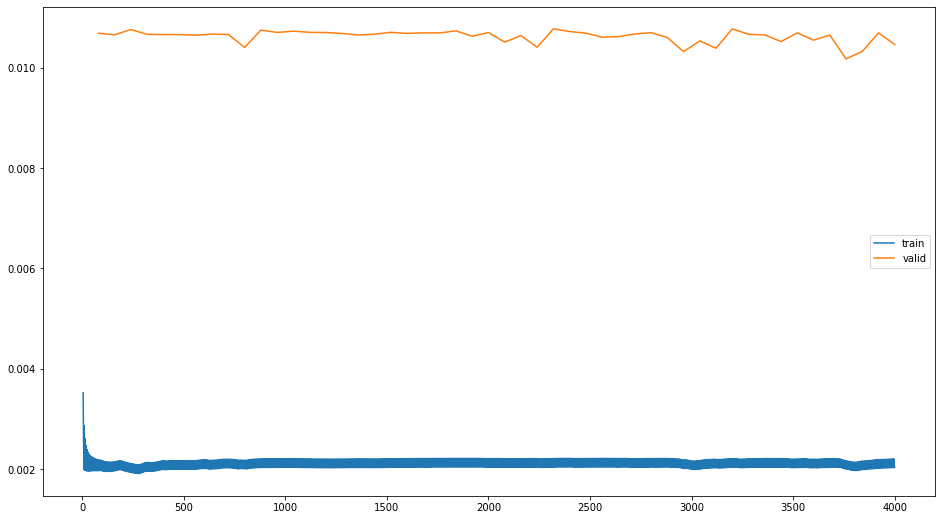

In [12]:
plt.figure(figsize=(16, 9))
gan_learn.recorder.plot_loss()

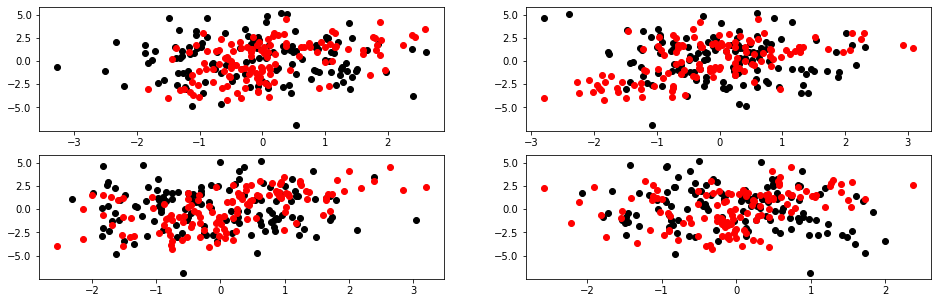

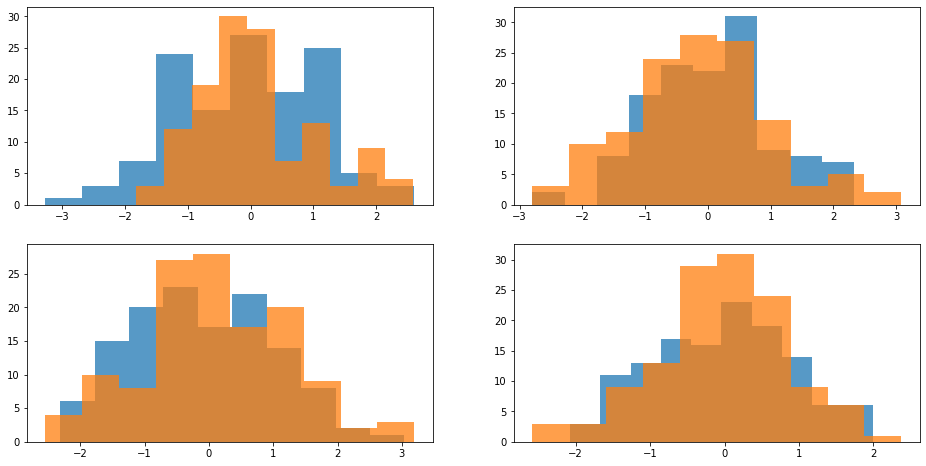

In [13]:
real_x = dls.one_batch()[1]
real_y = dls.one_batch()[2]

fake_x = gan_learn.model.generator(real_x, gan_learn.model.input_samples(real_x)).detach().numpy()

##########

plt.figure(figsize=(16, 5))
plt.subplot(221)
plt.plot(real_x[:, 0], real_y, 'ko')
plt.plot(fake_x[:, 0], fake_x[:, 4], 'ro')

plt.subplot(222)
plt.plot(real_x[:, 1], real_y, 'ko')
plt.plot(fake_x[:, 1], fake_x[:, 4], 'ro')

plt.subplot(223)
plt.plot(real_x[:, 2], real_y, 'ko')
plt.plot(fake_x[:, 2], fake_x[:, 4], 'ro')

plt.subplot(224)
plt.plot(real_x[:, 3], real_y, 'ko')
plt.plot(fake_x[:, 3], fake_x[:, 4], 'ro')

plt.show()

##########

plt.figure(figsize=(16, 8))

plt.subplot(221)
plt.hist(real_x[:, 0].numpy(), alpha=0.75)
plt.hist(fake_x[:, 0], alpha=0.75)

plt.subplot(222)
plt.hist(real_x[:, 1].numpy(), alpha=0.75)
plt.hist(fake_x[:, 1], alpha=0.75)

plt.subplot(223)
plt.hist(real_x[:, 2].numpy(), alpha=0.75)
plt.hist(fake_x[:, 2], alpha=0.75)

plt.subplot(224)
plt.hist(real_x[:, 3].numpy(), alpha=0.75)
plt.hist(fake_x[:, 3], alpha=0.75)

plt.show()